<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 다룰 내용

- Sample 데이터를 만들어 KNN에 대해 이해합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

# 1.데이터 준비

- 학습용 데이터를 만들고 데이터 분포를 확인합니다.

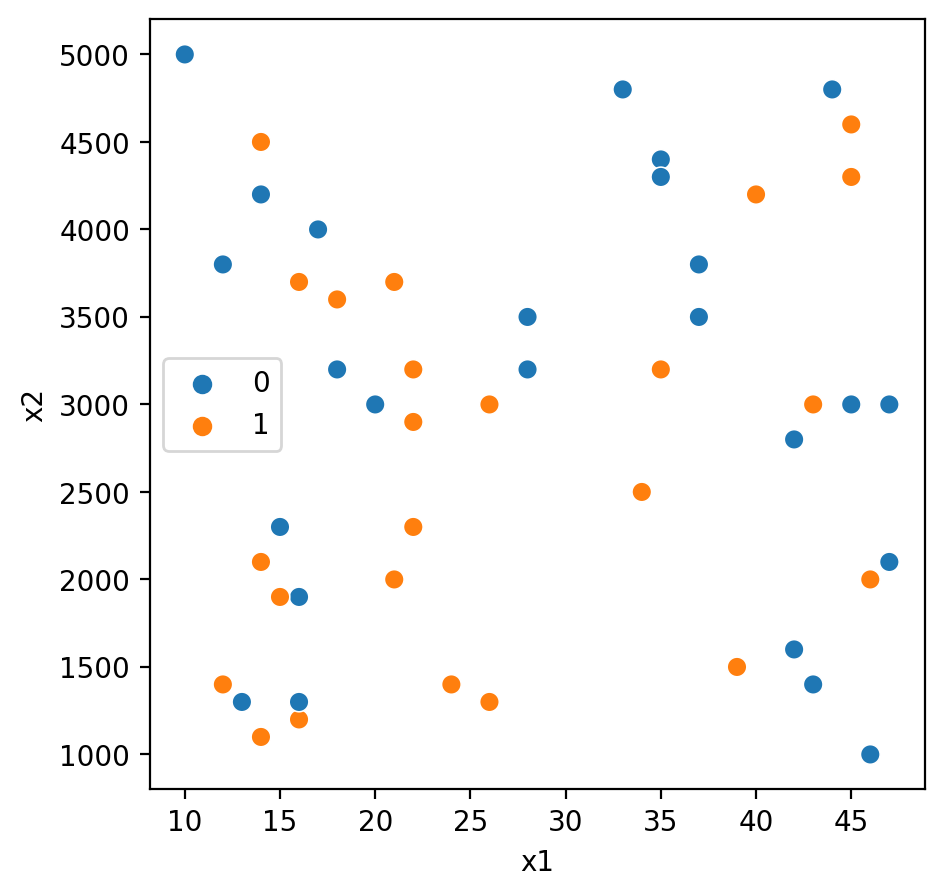

In [2]:
# 데이터 만들기
np.random.seed(12)
x = np.random.randint(10, 51, (50, 2))
y = np.random.randint(0, 2, 50)
x = x * [1, 100]

# 데이터 분포 시각화
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, s=50)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# 2.모델링

- KNN 알고리즘으로 모델을 만들고 학습합니다.
- 이웃 개수(n_neighbors)는 3으로 설정합니다.

In [3]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier

# 선언하기
model = KNeighborsClassifier(n_neighbors=3)

# 학습하기
model.fit(x, y)

KNeighborsClassifier(n_neighbors=3)

# 3.우리별 색깔은?

- 가장 가까운 3개의 이웃에게 물었습니다.
- **"이웃님들 우리별은 무슨 색인가요?"**

In [ ]:
# 우리별 자리
OUR_STAR = np.array([[26.5, 3210]])

# 기본 데이터
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, s=40)

# 별 표시
star = OUR_STAR
sns.scatterplot(x=star[:, 0], y=star[:, 1], 
                marker='*', 
                color='k', 
                s=350)

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


- **퀴즈!** 자신의 색깔을 찾지 못해 검게 변한 우리별 색깔은 무엇일까요?

# 4.우리별 색깔 확인

- 우리가 예상한 색깔이 맞는지 확인합니다.

In [ ]:
# 기본 데이터
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, s=40)

# 별 색깔 확인
y_pred = model.predict(star)
star_color = 'tab:blue' if y_pred == 0 else 'tab:orange'

# 별 표시
sns.scatterplot(x=star[:, 0], y=star[:, 1], 
                marker='*', 
                color=star_color, 
                s=350)

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

- 아하!우리별은 따뜻한 **<font color='orange'>오랜지색</font>** 이었네요!

# 5.우리별 이웃 확인

- 고마운 마음을 전하기 위해 빨간색을 찾아준 이웃을 확인합니다.

In [ ]:
# 별 이웃 찾기
star_neighbor=[]
for n in model.kneighbors(star)[1].ravel():
    star_neighbor.append(x[n].tolist())
star_neighbor = np.array(star_neighbor)

In [ ]:
# 기본 데이터
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, s=40)

# 별 표시
sns.scatterplot(x=star[:, 0], y=star[:, 1], 
                marker='*', 
                color=star_color, 
                s=350)

# 이웃 표시
plt.scatter(x=star_neighbor[:, 0], y=star_neighbor[:, 1], 
            linewidth=1,
            facecolors='none', 
            color='r', 
            s=100)

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

- 헉, 3개의 이웃이 이리도 **멀..................리** 떨어져 있었던가요???

# 6.정규화 후 다시 학습

- 진정한 이웃을 찾기 위해 정규화를 진행하고 다시 학습합니다.

In [ ]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

# 별 위치도 정규화 반영(OUR_STAR = np.array([[26.5, 3210]))
star = scaler.transform(OUR_STAR)

# 다시 학습
model.fit(x, y)

# 7.우리별 색깔은?

- 다시 한 번 가장 가까운 3개의 이웃에게 우리별 색깔을 물었습니다.

In [ ]:
# 기본 데이터
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, s=40)

# 별 색깔 확인
y_pred = model.predict(star)
star_color = 'tab:blue' if y_pred == 0 else 'tab:orange'

# 별 표시
sns.scatterplot(x=star[:, 0], y=star[:, 1], 
                marker='*', 
                color=star_color, 
                s=350)

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

- 오홋! 우리별은 시원한 **<font color='blue'>파란색</font>** 었네요!!

# 8.새로운 이웃 확인

- 고마운 마음을 전하기 위해 파란색을 찾아준 이웃을 확인합니다.

In [ ]:
# 가장 까까운 이웃 찾기
star_neighbor=[]
for n in model.kneighbors(star)[1].ravel():
    star_neighbor.append(x[n].tolist())
star_neighbor = np.array(star_neighbor)

In [ ]:
# 기본 데이터
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, s=40)

# 별 표시
sns.scatterplot(x=star[:, 0], y=star[:, 1], 
                marker='*', 
                color=star_color, 
                s=350)

# 이웃 표시
plt.scatter(x=star_neighbor[:,0], 
            y=star_neighbor[:,1], 
            linewidth=1,
            facecolors='none', 
            color='r', 
            s=100)

# 원 그리기
circle = plt.Circle((star[0, 0], star[0, 1]), 0.100, 
                    color='k', 
                    linewidth=1,
                    linestyle='--', 
                    fill=False)
plt.gca().add_artist(circle)

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

- 고마운 이웃이 정말 가까이 있었군요!!

# 9.이웃 수 늘리기

- 사교 능력을 최대한 발위해 이웃 수(n_neighbors)를 5개로 늘려봅니다.

In [ ]:
# 선언하기
model = KNeighborsClassifier(n_neighbors=5)

# 학습하기
model.fit(x, y)

# 10. 우리별 색깔은?

- 우리별 색깔은 여전히 파란색일까요?
- 가장 가까운 5개 이웃에게 다시 물었습니다.

In [ ]:
# 가장 까까운 이웃 찾기
star_neighbor=[]
for n in model.kneighbors(star)[1].ravel():
    star_neighbor.append(x[n].tolist())
star_neighbor = np.array(star_neighbor)

In [ ]:
# 기본 데이터
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, s=40)

# 별 색깔 확인
y_pred = model.predict(star)
star_color = 'tab:blue' if y_pred == 0 else 'tab:orange'

# 별 표시
sns.scatterplot(x=star[:, 0], y=star[:, 1], 
                marker='*', 
                color=star_color, 
                s=350)

# 이웃 표시
plt.scatter(x=star_neighbor[:, 0], y=star_neighbor[:, 1], 
            linewidth=1,
            facecolors='none', 
            color='r', 
            s=100)

# 원 그리기
circle = plt.Circle((star[0, 0], star[0, 1]), 0.17, 
                    color='k', 
                    linewidth=1, 
                    linestyle='--', 
                    fill=False)
plt.gca().add_artist(circle)

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

- 헛! 우리별은 따뜻한 **<font color='orange'>오랜지색</font>** 이었군요!!! 엥?